# Understanding the Data & Visualisations
## Tweets Data scraped by sns scrape

In [11]:
# installing necessary libraries
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 391 kB/s 


In [12]:
# importing the necessary libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz

In [1]:
# Reading the data
df = pd.read_csv('/content/tweets.csv')
df.head()

,url,tweet_date,content,tweet_id,reply_count,retweet_count,like_count,quote_count,conversation_id,language,...,user_id,username,displayname,description,followers_count,friends_count,statuses_count,favourites_count,listed_count,media_count
0,https://twitter.com/datapronetwork/status/1534...,2022-06-08 15:58:03+00:00,Five Trends to Watch for in the Data Science I...,1534565429837893639,0,0,0,0,1534565429837893639,en,...,705146173955264512,datapronetwork,Data Professionals Network | DPN,Data Professionals Network (DPN) connects & ch...,644,914,75218,152,25,42317
1,https://twitter.com/webAnalyste/status/1534565...,2022-06-08 15:58:03+00:00,Five Trends to Watch for in the Data Science I...,1534565429728817152,0,0,0,0,1534565429728817152,en,...,544884124,webAnalyste,Franck Scandolera,"#Freelance expert, formateur #Measure et #Data...",1394,856,68260,1743,306,58952
2,https://twitter.com/DrMattCrowson/status/15345...,2022-06-08 15:58:03+00:00,RT Five Trends to Watch for in the Data Scienc...,1534565426482384896,0,0,0,0,1534565426482384896,en,...,18622427,DrMattCrowson,Reluctant Quant,Hearing & Balance Surgeon @MassEyeAndEar Asst ...,1050,2003,36858,2593,51,33269
3,https://twitter.com/mtg_ds/status/153456539261...,2022-06-08 15:57:55+00:00,If you split Commander-eligible cards into fif...,1534565392613625857,0,0,0,0,1534565381406334976,en,...,1320313302384246784,mtg_ds,Magic Data Science,Doing math with Magic; doing Magic with math.\...,1320,181,873,289,18,313
4,https://twitter.com/mtg_ds/status/153456538733...,2022-06-08 15:57:53+00:00,If you split all releases into quintiles (fift...,1534565387337142274,1,0,0,0,1534565381406334976,en,...,1320313302384246784,mtg_ds,Magic Data Science,Doing math with Magic; doing Magic with math.\...,1320,181,873,289,18,313


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  1000 non-null   object 
 1   tweet_date           1000 non-null   object 
 2   content              1000 non-null   object 
 3   tweet_id             1000 non-null   int64  
 4   reply_count          1000 non-null   int64  
 5   retweet_count        1000 non-null   int64  
 6   like_count           1000 non-null   int64  
 7   quote_count          1000 non-null   int64  
 8   conversation_id      1000 non-null   int64  
 9   language             1000 non-null   object 
 10  retweeted_tweet_id   0 non-null      float64
 11  quoted_tweet_id      52 non-null     float64
 12  inreply_to_tweet_id  1000 non-null   object 
 13  user_id              1000 non-null   int64  
 14  username             1000 non-null   object 
 15  displayname          1000 non-null   ob

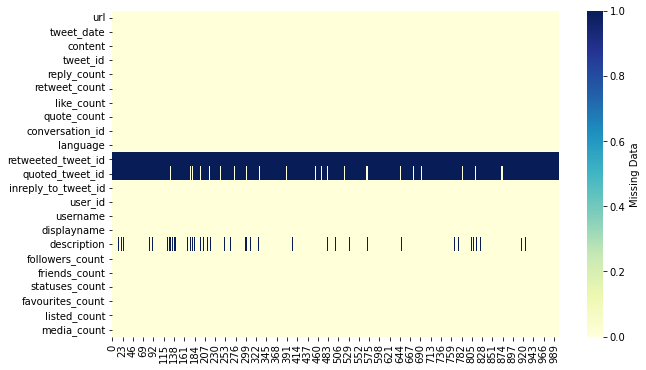

In [9]:
# Visualising nan values using seaborn heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=500)


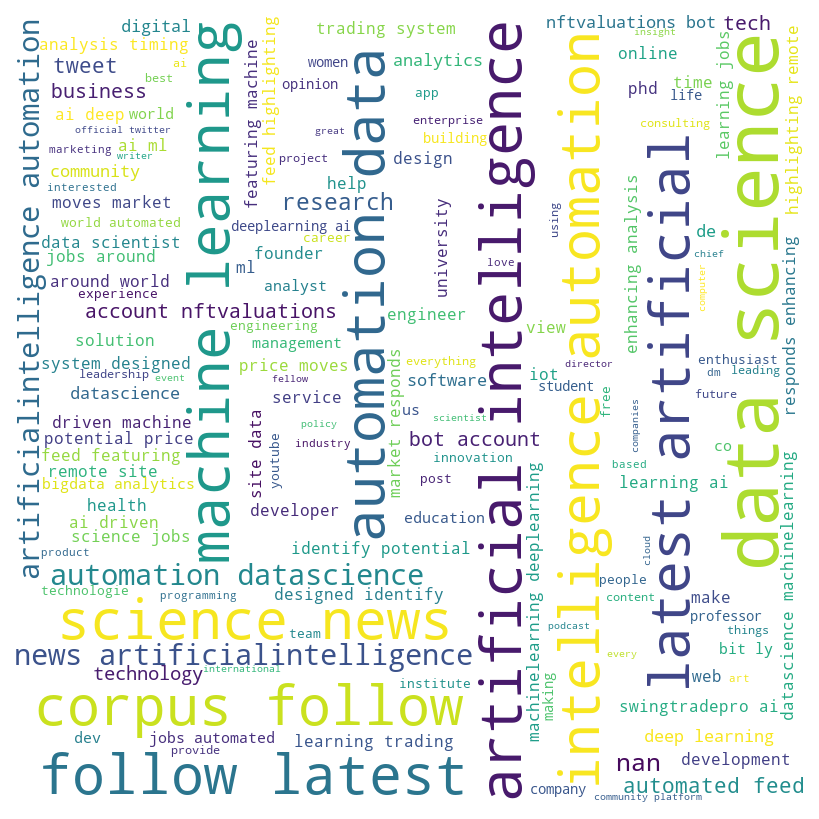

<Figure size 600x400 with 0 Axes>

In [29]:
# Visualising the words in the Tweets users description
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig("visualizing_words_in_tweet_users_description.png", dpi=500)

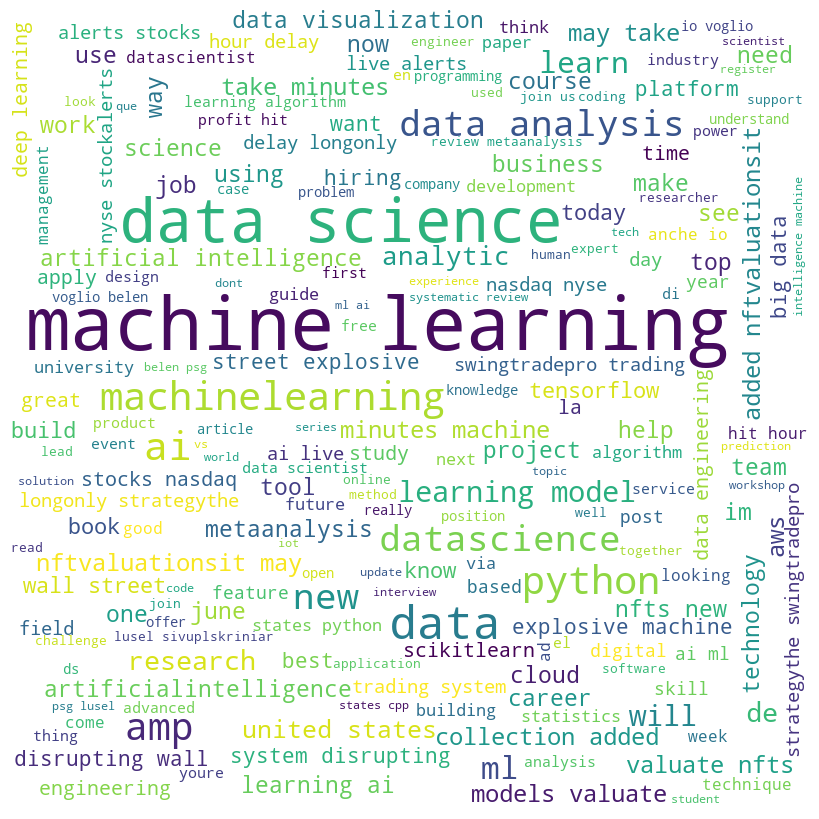

<Figure size 600x400 with 0 Axes>

In [30]:
# Visualising the words in the Tweets content
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.content:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
plt.savefig("visualizing_words_in_tweet_content.png", dpi=500)

In [13]:
# Generating Sweetviz report
my_report = sweetviz.analyze([df, "Train"],target_feat='like_count')
my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


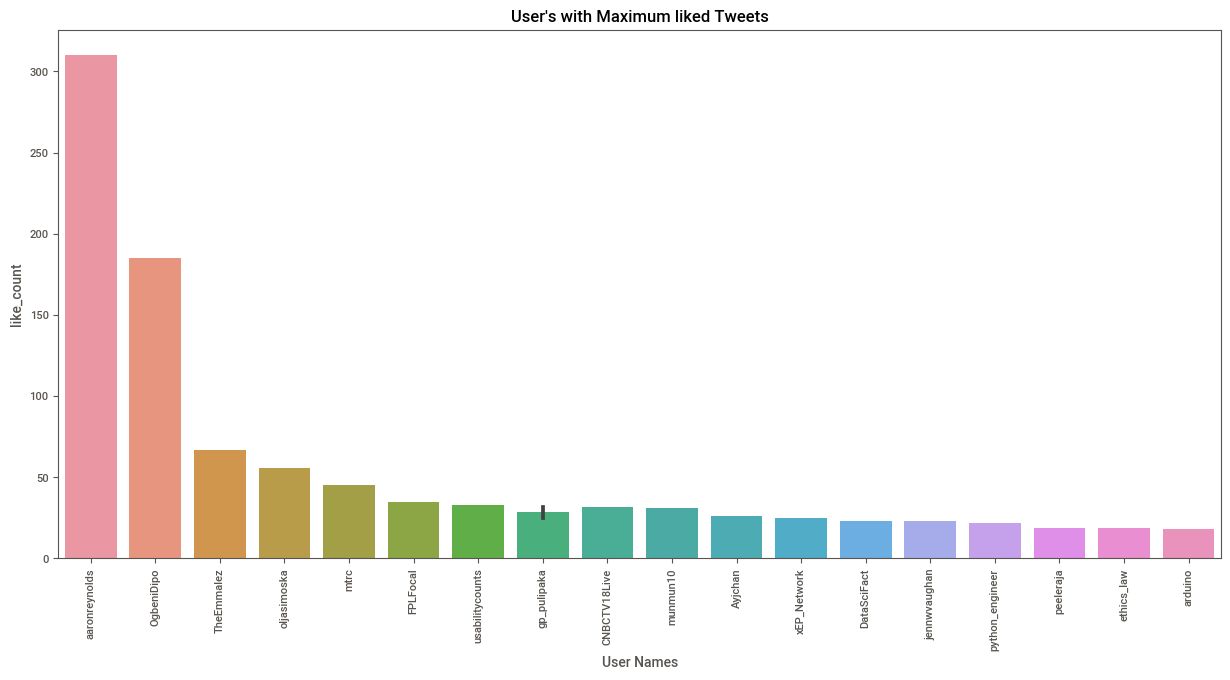

In [15]:
# User's with Maximum liked Tweets
toprating_df = df.sort_values('like_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='username', y="like_count", data=toprating_df,)
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 8)
p.set_title("User's with Maximum liked Tweets")
p.set(xlabel="User Names", ylabel="like_count")
plt.savefig("Users_with_max_liked_tweets.png", dpi=500)

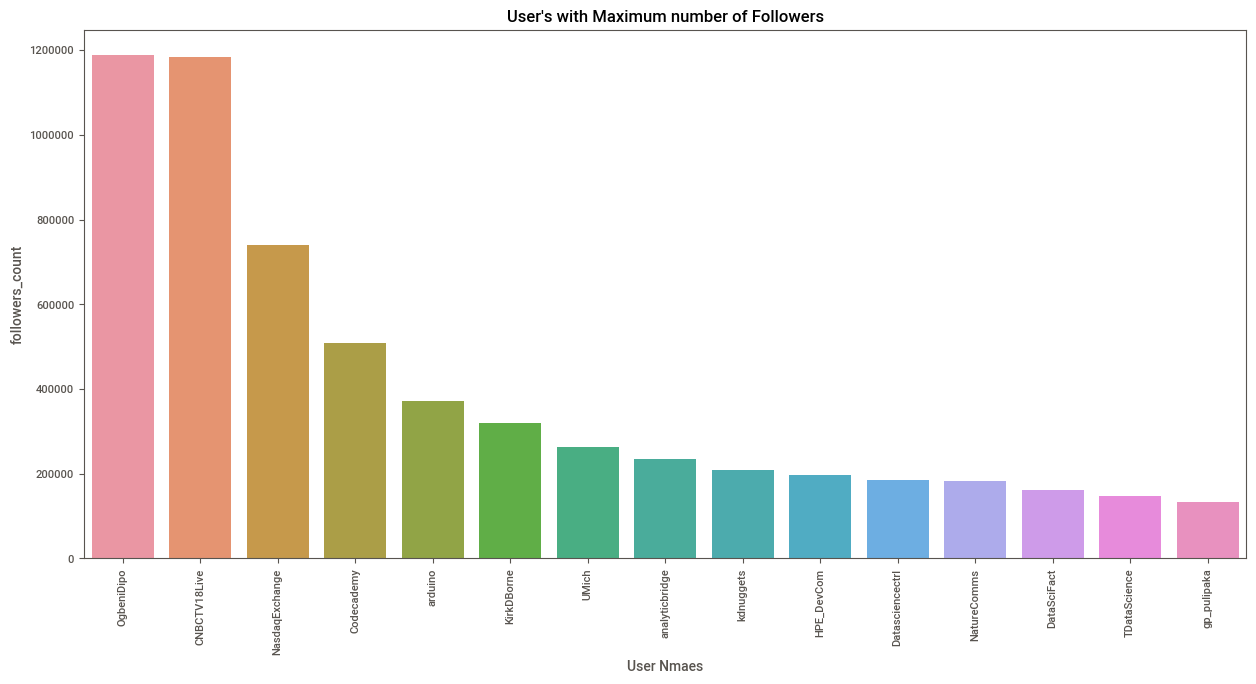

In [17]:
# User's with Maximum followers
toprating_df = df.sort_values('followers_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='username', y="followers_count", data=toprating_df,)
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 8)
p.set_title("User's with Maximum number of Followers")
p.set(xlabel="User Nmaes", ylabel="followers_count")
plt.savefig("Users_with_max_followers.png", dpi=500)

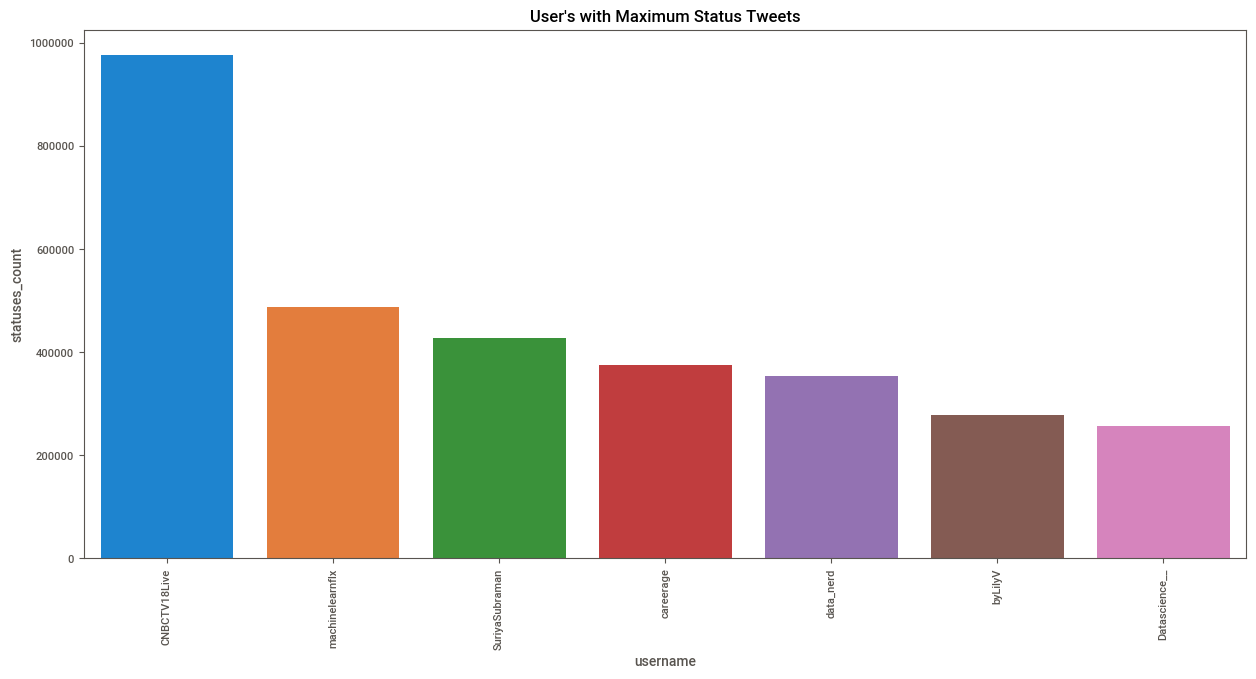

In [18]:
# User's with Maximum Status Tweets
toprating_df = df.sort_values('statuses_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='username', y="statuses_count", data=toprating_df,)
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 8)
p.set_title("User's with Maximum Status Tweets")
p.set(xlabel="username", ylabel="statuses_count")
plt.savefig("Users_with_max_status_tweets.png", dpi=500)

# Data Analysis

In [19]:
# Installing necessary lib
!pip3 install -U spacy
!python3 -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 21.6 MB/s 
     |████████████████████████████████| 181 kB 66.8 MB/s 
     |████████████████████████████████| 660 kB 61.6 MB/s 
     |████████████████████████████████| 10.1 MB 48.9 MB/s 
     |████████████████████████████████| 457 kB 53.3 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 58 kB 6.3 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled sr

In [39]:
import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity


from sklearn.metrics import jaccard_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df.head(2)

,url,tweet_date,content,tweet_id,reply_count,retweet_count,like_count,quote_count,conversation_id,language,...,user_id,username,displayname,description,followers_count,friends_count,statuses_count,favourites_count,listed_count,media_count
0,https://twitter.com/datapronetwork/status/1534...,2022-06-08 15:58:03+00:00,Five Trends to Watch for in the Data Science I...,1534565429837893639,0,0,0,0,1534565429837893639,en,...,705146173955264512,datapronetwork,Data Professionals Network | DPN,Data Professionals Network (DPN) connects & ch...,644,914,75218,152,25,42317
1,https://twitter.com/webAnalyste/status/1534565...,2022-06-08 15:58:03+00:00,Five Trends to Watch for in the Data Science I...,1534565429728817152,0,0,0,0,1534565429728817152,en,...,544884124,webAnalyste,Franck Scandolera,"#Freelance expert, formateur #Measure et #Data...",1394,856,68260,1743,306,58952


### Text Classification
1. Cleaning the tweets
lemmatization, tokenizing, removing stopwards, punctuations, hashtags and mentions

In [35]:
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(df, 'content')
clean_tweets.head(2)

,url,tweet_date,content,tweet_id,reply_count,retweet_count,like_count,quote_count,conversation_id,language,...,user_id,username,displayname,description,followers_count,friends_count,statuses_count,favourites_count,listed_count,media_count
0,https://twitter.com/datapronetwork/status/1534...,2022-06-08 15:58:03+00:00,five trends to watch for in the data science i...,1534565429837893639,0,0,0,0,1534565429837893639,en,...,705146173955264512,datapronetwork,Data Professionals Network | DPN,Data Professionals Network (DPN) connects & ch...,644,914,75218,152,25,42317
1,https://twitter.com/webAnalyste/status/1534565...,2022-06-08 15:58:03+00:00,five trends to watch for in the data science i...,1534565429728817152,0,0,0,0,1534565429728817152,en,...,544884124,webAnalyste,Franck Scandolera,"#Freelance expert, formateur #Measure et #Data...",1394,856,68260,1743,306,58952


In [42]:
#remove stopwords, punctuations, lemmatize and tokenize word
# nlp = spacy.load("en_core_web_sm")   #working with english only, no support for swahili
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
df.content = df.content.apply(furnished)

2. Defining the set of words

In [46]:
economy_related_words = '''agriculture infrastructure capitalism trading service sector technology  economical supply 
                          industrialism efficiency frugality retrenchment downsizing   credit debit value 
                         economize   save  economically
                         economies sluggish rise   rising spending conserve trend 
                         low-management  decline   industry impact poor  
                            profession    surplus   fall
                         declining  accelerating interest sectors balance stability productivity increase rates
                            pushing expanding stabilize  rate industrial borrowing struggling
                           deficit predicted    increasing  data
                          economizer analysts investment market-based economy   debt free enterprise
                         medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
                         asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics
                         bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation 
                         quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital
                         mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution
                         bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter 
                         distribution downturn economist'''

social_related_words = '''sociable, gregarious societal friendly society socialization political  sociality 
                        interpersonal  ethnic socially party welfare public community socialist societies development
                            network humans socialism collective personal corporation social constructivism
                        relations volition citizenship brute   attitude rights socio 
                        socioeconomic ethics civic communal marital  sociale socialized communities     
                         policy   unions        
                        institutions values     governmental   organizations jamboree 
                         festivity    fairness  support  care  
                         sides   activism     unsocial psychosocial 
                        socializing psychological distributional  demographic  participation reunion 
                        partygoer partyism festive power network gala housewarming celebration counterparty   social-war
                        particularist interactional ideational asocial'''

culture_related_words  = ''' ethnicity heritage modernity spirituality marxismmaterial culture 
                           ethos nationality humanism romanticism civilisation traditionalism genetics
                        kinship heredity marriage   indigenous  archeology  acculturate  
                       ontogenesis viniculture modern clothes     rooted 
                       cicero societies history roots influence geography historical folk origins 
                       phenomenon teleology ancient aspects perspective liberalism nowadays community style unique prevalent describes 
                         today  origin   modernity beliefs  genre barbarian ethnic 
                       colonization cultural universal organization western-civilization structuralism  culture 
                       heathen pagan transculturation culture peasant classicist nativism anarchy ungrown philosophic cult  
                       consciousness islamist bro-culture evolve cultic diaspora aftergrowth native cultural-relativism  
                       mongolian cosmopolitan epistemology lifestyles diversity chauvinism westernization materialism vernacular 
                       homogeneity otherness holism tusculanae disputationes primitivism superficiality hedonism discourse
                       puritanism modernism intellectualism  exclusiveness elitism  colonialism  
                       pentecostalism paganism nationwide expansion rural  auxesis kimono 
                       culturize alethophobia nettlebed japanification  dongyi clannishness insularity hybridity
                       westernisation foreignness worldview exclusionism enculturation ethnocentrism  confucianist vulgarization
                       shintoism  westernism denominationalism    deracination
                        eurocentrism  cosmologies  emotiveness bohemianism territorialism
                       philosophical-doctrine ethnic minority social-darwinism  theory cultural evolution belief systemfolk music 
                       traditional art house karl-marx   theorymedia  
                       film-theory art history museum studies cultural artifact'''

health_related_words = '''disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health 
                     nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing
                     care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals 
                     health care provider doctors healthy community design insurance sanitation human body patient mental health
                      medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy
                     metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family
                     eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease 
                     study protection malaria development food priority management healthful mental provide department administration
                     programs help assistance funding environment improving emergency need program affected schools private mental illness 
                     treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives
                     gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma 
                     pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning 
                     bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork 
                     manufacturing medical sociology need exercise run'''

3. Preprocessing the sets.
Tokenizing and removing stop words from the sets

In [47]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [48]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

Removing duplicates

In [49]:
# delete duplicates
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))

string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))

string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))

string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))

4. Vectorizing and Standadization.
Necessary if cosine similarity would be used

In [84]:
'''Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least 
frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length 
of the tweets and the length of set of words.'''


def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer()
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [83]:
social

'sociable, gregarious societal friendly society socialization political sociality interpersonal ethnic socially party welfare public community socialist development network human socialism collective personal corporation social constructivism relation volition citizenship brute attitude right socio socioeconomic ethic civic communal marital sociale socialized policy union institution value governmental organization jamboree festivity fairness support care side activism unsocial psychosocial socializing psychological distributional demographic participation reunion partygoer partyism festive power gala housewarming celebration counterparty social-war particularist interactional ideational asocial'

In [85]:
socialvector = get_vectors(social)
economic_vector = get_vectors(economy)
culture_vector = get_vectors(culture)
health_vector = get_vectors(health)

In [86]:
## Vectorizing the tweets
tv=TfidfVectorizer()
tfidf_tweets =tv.fit_transform(df.content)

In [87]:
'''Jaccard similarity is good for cases where duplication does not matter, 
cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, 
it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.'''

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [89]:
# economic scores
e_scores = get_scores(economy, df.content.to_list())
e_scores[-10:]

[0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.6571428571428571,
 0.7,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333]

In [90]:
s_scores = get_scores(social, df.content.to_list())
s_scores[-10:]

[0.7,
 0.7931034482758621,
 0.7586206896551724,
 0.6764705882352942,
 0.7241379310344828,
 0.7586206896551724,
 0.7333333333333333,
 0.7586206896551724,
 0.7333333333333333,
 0.7586206896551724]

In [91]:
c_scores = get_scores(culture, df.content.to_list())
c_scores[-10:]

[0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.6571428571428571,
 0.7,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333,
 0.7666666666666667,
 0.7333333333333333]

In [92]:
h_scores = get_scores(health,df.content.to_list())
h_scores[:6]

[0.8076923076923077,
 0.6153846153846154,
 0.8076923076923077,
 0.696969696969697,
 0.6857142857142857,
 0.7857142857142857]

In [93]:
'''new df with names, and the jaccard scores for each group'''

data  = {'names':df.username.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,names,economic_score,social_score,culture_score,health_scores
0,datapronetwork,0.750000,0.777778,0.750000,0.807692
1,webAnalyste,0.571429,0.592593,0.571429,0.615385
2,DrMattCrowson,0.750000,0.777778,0.750000,0.807692
3,mtg_ds,0.657143,0.628571,0.657143,0.696970
4,mtg_ds,0.742857,0.714286,0.742857,0.685714
5,AmirSariaslan,0.733333,0.700000,0.733333,0.785714
6,mtg_ds,0.676471,0.696970,0.676471,0.666667
7,AINewsFeed,0.750000,0.777778,0.750000,0.807692
8,marigo,0.700000,0.724138,0.700000,0.689655
9,codingfess,0.785714,0.814815,0.785714,0.777778


In [94]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal

In [95]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()

econ, socio, cul, heal = get_clusters(l1, l2, l3, l4)

In [96]:
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

,name,economic,social,culture,health
0,datapronetwork,0,0,0,1
1,webAnalyste,0,0,0,1
2,DrMattCrowson,0,0,0,1
3,mtg_ds,0,0,0,1
4,mtg_ds,1,0,1,0


In [97]:
'''Due to the close similarity between the economic, social and health tweets, some tweets have multiple categories, 
so to take care of that the rows with a sum > 1 will have to share the categories. After this, clustering will take care 
of the fractions'''


a =  cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1) > 1
c = cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['economic','social', 'culture', 'health']] = 1/c

In [98]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
pivot_clusters['social'] = pivot_clusters['social'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['health'] = pivot_clusters['health'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['culture'] + pivot_clusters['social'] +  pivot_clusters['economic']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(705, 5)


,economic,social,culture,health,total
name,,,,,
zala_tech,0,0,0,1,1
zaydkara,0,0,0,1,1
znatko,0,1,0,0,1
zogaweb3,0,0,0,0,0
Total,23,154,23,720,920


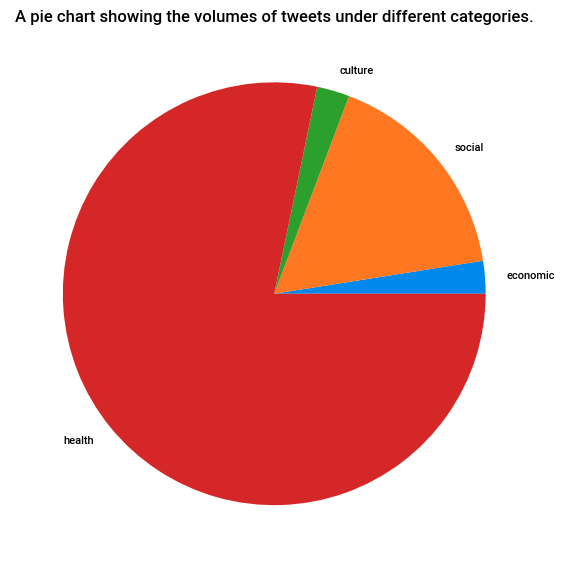

In [99]:
'''A pie chart to show the total number of tweets in each category'''

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'total tweets')

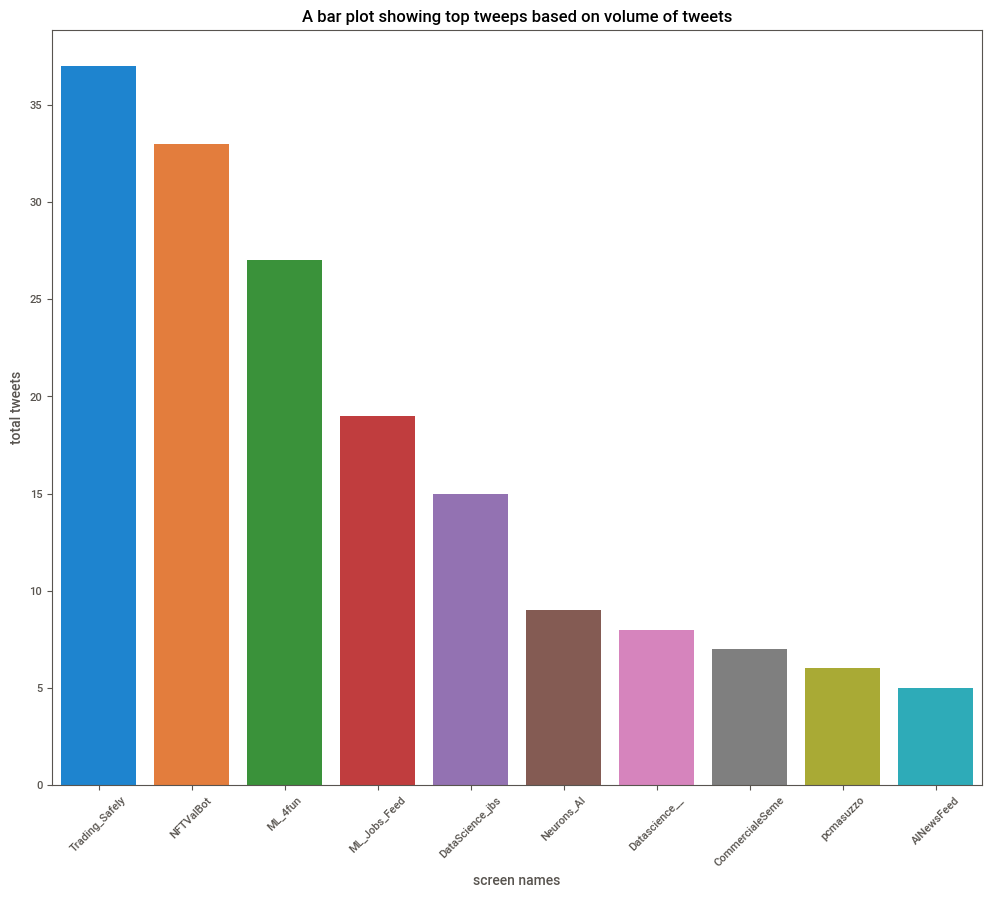

In [100]:
d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('total tweets')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'economy tweets')

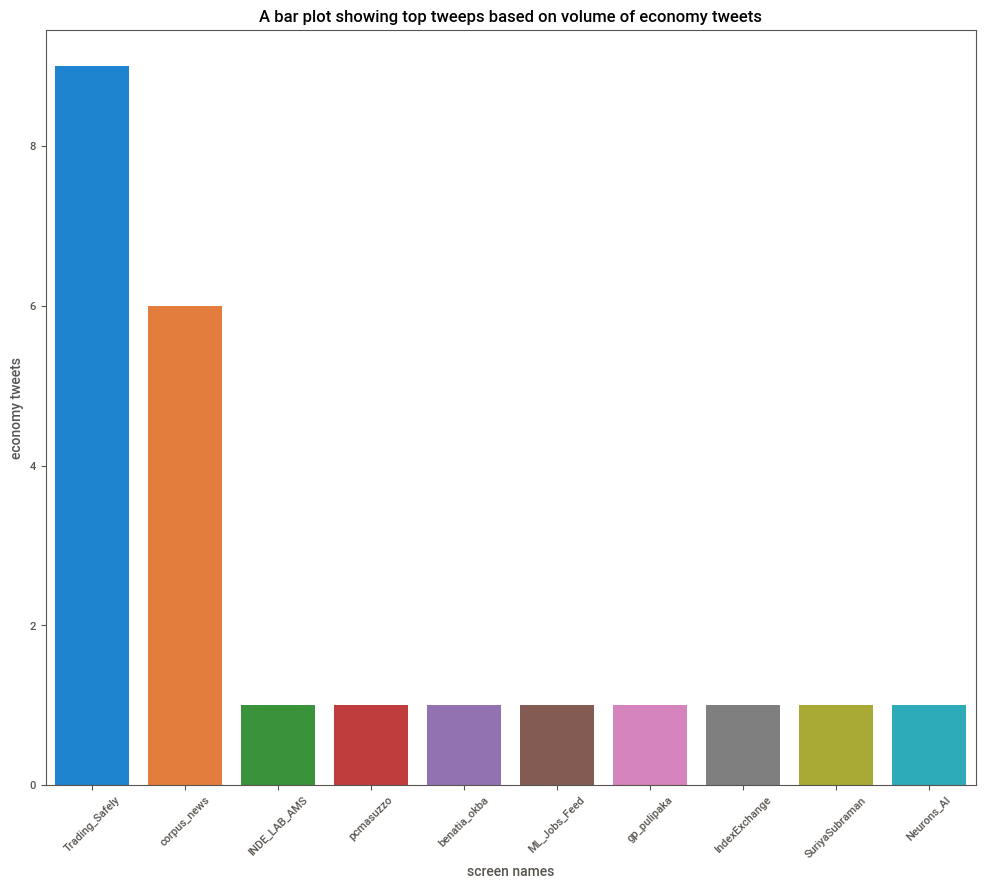

In [101]:
d = pivot_clusters.sort_values(by = 'economic', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.economic)
plt.title('A bar plot showing top tweeps based on volume of economy tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('economy tweets')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'social tweets')

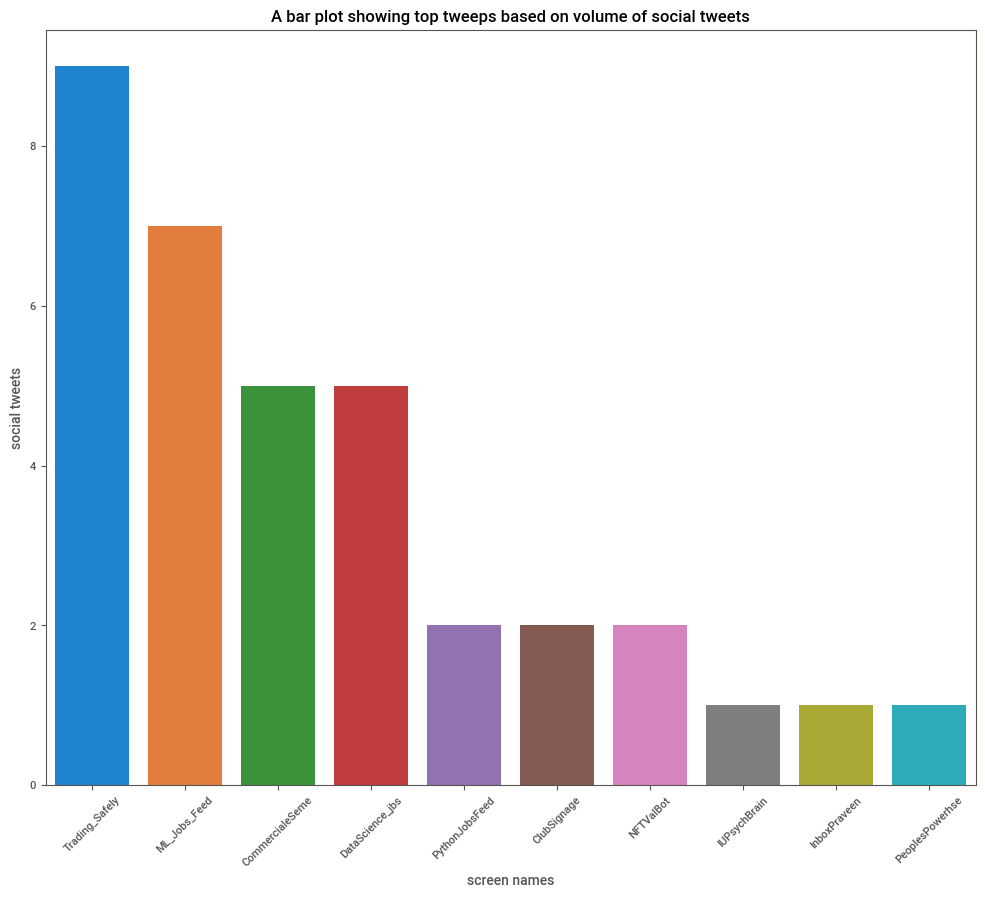

In [102]:
''' Users with most social tweets'''

d = pivot_clusters.sort_values(by = 'social', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.social)
plt.title('A bar plot showing top tweeps based on volume of social tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('social tweets')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'culture tweets')

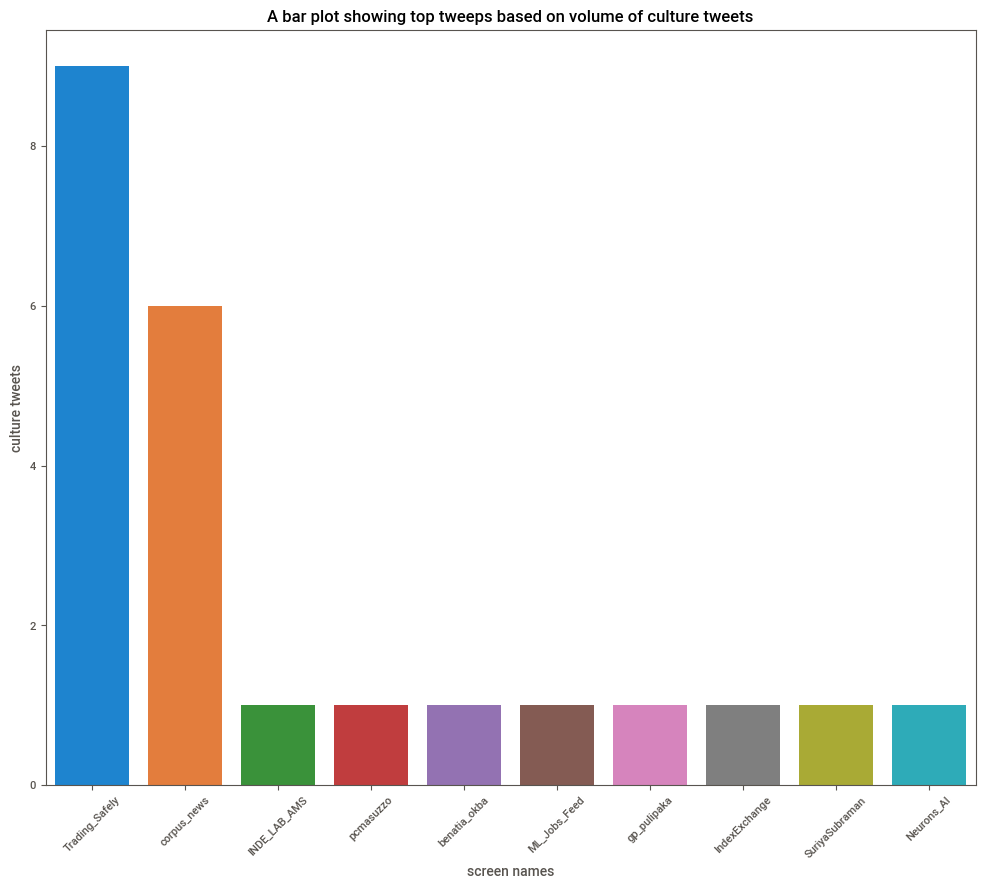

In [104]:
''' Users with most culture tweets'''

d = pivot_clusters.sort_values(by = 'culture', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.culture)
plt.title('A bar plot showing top tweeps based on volume of culture tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('culture tweets')

# Clustering

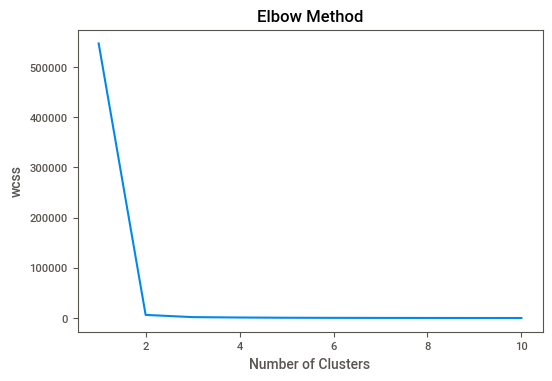

In [107]:
from sklearn.cluster import KMeans
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'social', 'culture', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

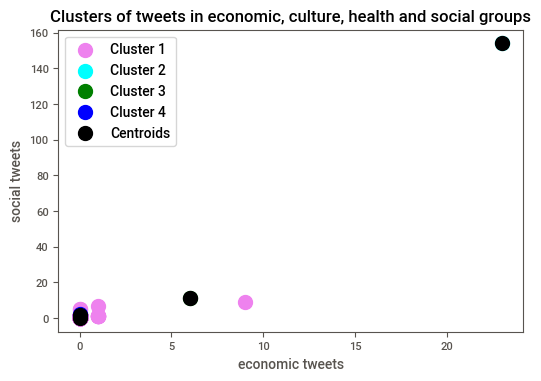

In [109]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic, culture, health and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()